# Homework 7 - Monte Carlo and Fast Exponential Transform

## Problem 0 (45 points) - Metroplis-Hastings algorithm

Suppose we have 10 particles with positions $x_i$  resting in potential well $V(x)= x^4-x^2-0.1x$:

Text(0, 0.5, 'V(x)')

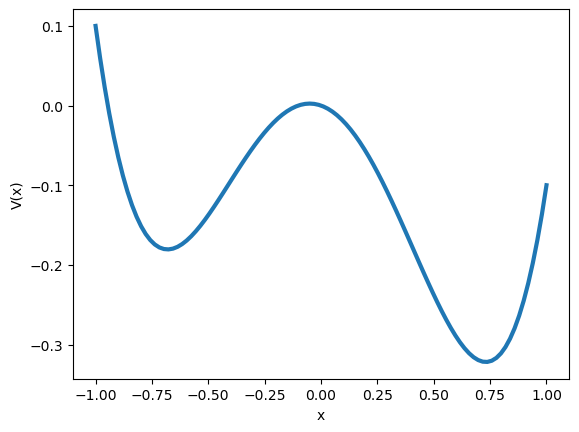

In [7]:
import numpy as np
import matplotlib.pyplot as plt

V = lambda x: x**4 - x**2 - 0.1*x # confining potential

xx = np.linspace(-1, 1, 100)
plt.plot(xx, V(xx), linewidth=3)
plt.xlabel('x')
plt.ylabel('V(x)')

If the particles have charges $q_i$, then the total energy of the system is
$$
H(\boldsymbol{x}) = \sum_{\text{pairs} (i,j)} \frac{q_iq_j}{|x_i-x_j|} + \sum_i V(x_i).
$$
According to satistical physics, if the particles are in thermal equillibrium at temperature $T$, then probability distribution of particles will be
$$
p(\boldsymbol{x}) = Z^{-1} e^{-H(\boldsymbol{x})/T},
$$
where $Z$ is a normalizing constant.


We will use the Metroplis-Hastings algorithm to find the expected number of particles in the right well ($x>0$).

The following function will generate our initial condition.

In [9]:
def gen_pts(npart=10):
    ' Generate n charged particles with random positions and charges '
    xs = 2*np.random.rand(npart) - 1# uniformly distributed intial condition
    qs = np.random.rand(npart)
    return xs, qs

### Part A (5 points)
In the Metroplis-Hastings algorithm, we propose a new sample based on the previous sample:
$$
\boldsymbol{y}_{k+1} = F_i(\boldsymbol{x}_{k})
$$
For this problem, we shall need three kinds of steps one for moving our particles. In the first kind of step, which we call `walk_step`, will move the particles slightly:
$$
y_{i,k+1} = x_{i,k} + \delta W_{i,k},
$$
where $W_{i,k}$ is a standard normal random variable.
In the second kind of step (`swap_step`), we will randomly permute the particles:
$$
y_{i,k+1} = x_{P(i),k},
$$
where $P$ is a random parmutation.
The final kind of step (`flip_step`) will move one random particle ($j_k$) to the other well.
$$ 
y_{i,k+1} = \begin{cases} -x_{i,k} & i == j_{k}\\ x_{i,k} &\text{o.w.}\end{cases}
$$

The overall rule for generating the $y_{i,k+1}$ will be to do a `swap_step` with probability $a$, a `flip_step` with probability $b$, or `walk_step` if we do neither of the other steps.

Once we have generated the proposed step $\boldsymbol{y}_{k+1}$, the Metroplis-Hastings algorithm says that we accept it (i.e. set $\boldsymbol{x}_{k+1}=\boldsymbol{y}_{k+1}$) with probability $\min(p(\boldsymbol{y}_{k+1})/p(\boldsymbol{x}_{k}),1)$. If the step is rejectect, we set $\boldsymbol{x}_{k+1}=\boldsymbol{x}_{k}$.

Fill in the functions below to allow us to generate the next sample in the Metrpolis-Hastings alogirthm.

In [10]:
def walk_step(xs, delta = 0.1):
    pass

def swap_step(xs):
    pass

def flip_step(xs):
    pass

def mc_step(xs, p, a=0.1, b=0.1):
    pass


### Part B (15 points) - Note the weight of this question
A Monte Carlo scheme will only converge quickly if the generated samples rapidly explore the state space (i.e. the potential particle positions).

Technically `walk_step` is capable of reordering the particles and moving particles to the other well and therefore exploring the state space.
Why will introducing `swap_step` and `flip_step` allow our scheme to converge faster? 

### Part C (10 points)
Complete the function `mcmc_sim`, which generates the samples $\boldsymbol{x}_{1},\;\boldsymbol{x}_{2},\;\ldots$. You will need to initialize the system with `gen_part` and then run `nburn` steps to allow the system to converge to it's equillibrium distribution. After that initialization period, generate `nsamp` new samples and save them. The function should then return those saved samples.

Once the function is completed, use it with `nsamp = 10**4` and `nburn = 10**2` to estimate the number of particles in the right well.

In [15]:
def mcmc_sim(nsamp, nburn, npart=10, T = 2):
    pass

### Part D (5 points)
Make a histogram of the particle positions using the same samples as in the previous question. Note that for this problem, we don't distinguish between particles $i$ and $j$, so you should "flatten" the samples into a one-dimensional array  before plotting.

### Part E (10 points)
For this problem set `nsamp = 10**3`. Compare the estimate with `nburn = 0` and `nburn = 10**3`. Which one is closer to your estimate from the previous question and why?

## Problem 1 (30 points) - Fast Exponential Transform

In this problem, we will experiment with a common fast algorithm for applying exponential functions in 1D. Suppose we have sorted points $x_0,\dots,x_{n-1} \in \mathbb{R}$ and "weights" $c_0,\dots,c_{n-1}$ and we want to compute the sum
$$f_i = \sum_{j=0}^{n-1} \exp(-|x_i-x_j|) c_j,$$
for $i=0,1,2,\dots,n-1.$ 

### Part A (5 points)

The most straightforward way to find $f_0,\dots,f_{n-1}$ is via linear algebra. Make a big matrix $E$ with $E_{i,j}= \exp(-|x_i-x_j|).$ If we set $c$ to be the vector of weights, and $f$ to be the vector of values we want, then we get
$$f = Ec.$$

Implement a routine `exp_transform(x,c)` which takes in a vector of $x$ "positions" ($x_0<x_1<\dots<x_{n-1}$) and a vector of weights $c$ and outputs the corresponding $f$ values as a vector using this approach.

Test its performance in terms of time by taking 200,400,800,1600,3200,6400,10000 random normal numbers for the $x$ positions and setting all of the $c$'s to be one (only time the `exp_transform(x,c)` routine, not the time to generate $x$ or sort it). Plot your results. If the latter trials are taking too long then feel free to exclude them from your results (just make a note).

In [67]:
## Your code here

Unfortunately, for large $n,$ (think 10's of thousands to millions) creating and storing $E$ can get expensive, and applying the matrix will take $O(n^2)$ operations. Let's try to find a better way. For a given point $x_i$ let $L_i$ be the collection of all the points to the left of $x_i$ and $R_i$ be the collection of all points to the right of $x_i.$ Then

$$ f_i = c_i + \sum_{j \in L_i} \exp(x_j-x_i) c_j +\sum_{j \in R_i} \exp(x_i-x_j) c_j.$$

Set $w_i = \sum_{j \in L_i} \exp(x_j-x_i) c_j,$ and $u_i = \sum_{j \in R_i} \exp(x_i-x_j) c_j.$ Then, after some arithmetic, we see that
$$w_{i+1} = \exp(x_i-x_{i+1}) (w_i + c_i)$$
and
$$u_{i-1} = \exp(x_{i-1}-x_{i}) (u_i + c_i)$$

### Part B (10 points)

Write a function, `sweep_right(x,c)` which computes all the $w$'s using the above recurrence formula. Your routine should start with $w_0 = 0,$ and compute $w_1 = \exp(x_0-x_1)*c_0,$ then $w_2 = \exp(x_1-x_2)*(w_1+c_1),$ and so on.

Write a function, `sweep_left(x,c)` which computes all the $u$'s using the above recurrence formula. Your routine should start with $u_{n-1} = 0,$ and compute $u_{n-2} = \exp(x_{n-2}-x_{n-1})*c_{n-1},$ then $u_{n-3} = \exp(x_{n-3}-x_{n-2})*(u_{n-2}+c_{n-2}),$ and so on. When implementing this method, it might be helpful to use `numpy.flip` to reverse the $x$ and $c$ vectors to make your code look similar to `sweep_right` - just make sure to check the signs in the exponents and to make sure that the output is flipped properly.

In [8]:
## Your code here

### Part C (10 points)

Write a function `fast_exp_transform(x,c)` which takes in a vector of $x$ "positions" ($x_0<x_1<\dots<x_{n-1}$) and a vector of weights $c$ and outputs the corresponding $f$ values as a vector using your `sweep_left` and `sweep_right` functions and the formula above.

Test its accuracy against `exp_transform` for a small number of points (100 let's say).

Test its performance in terms of time by taking 200,400,800,1600,3200,6400,10000 random normal numbers for the $x$ positions and setting all of the $c$'s to be one (only time the `fast_exp_transform(x,c)` routine, not the time to generate $x$ or sort it). Plot your results. *Make sure the points are sorted!* 

How many points can you do? 

What is the crossover point between this approach and `exp_transform` if any? i.e. for what value of $n$ will the two take about the same time?

What is the computational complexity (in $n$) of your `fast_exp_transform` code?

In [9]:
## Your code here


### Part D (5 points)

Try to optimize both codes as much as possible. For example, you could try to vectorize the construction of the exponentials in the first approach. You could try to use `numba` to try to accelerate the second. You can precompute the exponentials of the distances between consecutive $x$ values and pass that as an optional argument to your sweeping routines. How much can you improve your code? This is an open-ended question and there is no "right" answer. 

In [10]:
## Your code here
